# Recurrent Neural Networks

calcular o preço das ações do google

### Part 1 - Data Preprocessing

#### Alterações

* Considerar de 60 dias para 80 dias

In [360]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [361]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [362]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [363]:
# Creating a data structure with 80 timesteps and 1 output
X_train = []
y_train = []
for i in range(80, 1258):
    X_train.append(training_set_scaled[i-80:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Part 2 - Building the RNN

#### Alterações

* Depois de vários testes trocando os hyper-parâmetros, praticamente todas as alterações converg
* Remoção das camadas de Dropout, pois nesse caso é melhor que a rede se ajuste melhor ao conjunto de treinamento e seja capaz de reagir mais rapidamente as mudanças durante a predição
* Alteração das camadas para o formato 60 -> 120 -> 60 -> 1
* Alteração do batch_size para 16
* Alteração da quantidade de épocas para 50 ( Na configuração atual, depois da época 30 a rede não consegue melhorar o aprendizado diminuindo o loss abaixo de 3.e-4)

In [364]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 120, return_sequences = True))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 120, return_sequences = True))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [365]:
regressor.fit(x = X_train, y = y_train, batch_size = 16, epochs = 50)

Epoch 1/50
74/74 [==============================] - 8s 105ms/step - loss: 0.0187
Epoch 2/50
74/74 [==============================] - 8s 104ms/step - loss: 0.0020
Epoch 3/50
74/74 [==============================] - 8s 106ms/step - loss: 0.0021
Epoch 4/50
74/74 [==============================] - 8s 106ms/step - loss: 0.0019
Epoch 5/50
74/74 [==============================] - 8s 106ms/step - loss: 0.0016
Epoch 6/50
74/74 [==============================] - 8s 107ms/step - loss: 0.0019
Epoch 7/50
74/74 [==============================] - 8s 106ms/step - loss: 0.0018
Epoch 8/50
74/74 [==============================] - 8s 106ms/step - loss: 0.0014
Epoch 9/50
74/74 [==============================] - 8s 106ms/step - loss: 0.0018
Epoch 10/50
74/74 [==============================] - 8s 106ms/step - loss: 0.0013
Epoch 11/50
74/74 [==============================] - 8s 108ms/step - loss: 0.0014
Epoch 12/50
74/74 [==============================] - 8s 107ms/step - loss: 0.0015
Epoch 13/50
74/74 [======

### Part 3 - Making the predictions and visualising the results

In [368]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 80:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling
X_test = []
for i in range(80, 100):
    X_test.append(inputs[i-80:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

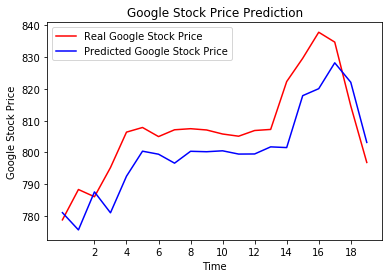

In [369]:
# Visualising the results
plt.xticks(np.arange(2, 20, 2))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## FIM